# Assignment 1
## Zipf's law

### Task:
Empirically verify Zipf’s law. Use the following freely available corpora:

- King James Bible (in Moodle)
- The Jungle Book (in Moodle)
- SETIMES Turkish-Bulgarian parallel newspaper text http://opus.lingfil.uu.se/download.php?f=SETIMES2/bg-tr.txt.zip

For each corpus, compute a list of unique words sorted by descending fre-
quency. Feel free to tokenize however you like, e.g. by splitting at whitespace.
Use the Python library matplotlib to plot the frequency curves for the cor-
pora, i.e. x-axis is position in the frequency list, y-axis is frequency. Make
sure to provide both a plot with linear axes and one with log-log axes (see
methods matplotlib.pyplot.plot and matplotlib.pyplot.loglog) for
each corpus.
Provide a brief discussion of the findings, as well as the source code.


## Import statements and global config

In [1]:
import os
from pathlib import Path

import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/pavle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Constants

In [23]:
# The directory on my machine where corpora are stored
CORPORA_DIR = "corpora"

# Number of top ranked tokens to print in a table
TOP_N = 20

# Strings for plotting
NORMAL_SCALE = "Normal scale"
LOGLOG_SCALE = "Loglog scale"
X_LABEL = "Ranks"
Y_LABEL = "Frequencies"

## Helper functions

In [16]:
def load_corpus(corpus_name, to_lower=False, corpus_dir=True):
    """
    Function that load a corpus and do the tokenization.
    
    ...
    
    Parameters:
    -----------
    corpus_name : str
        The full name of a corpus, should include extension.
    to_lower : bool, optional
        A flag which indicates that tokens will be processed to lowercase.
    corpus_dir : bool, optional
        A flag which indicates if corpus is in the separate directory or in the working directory. 
        The assumption is that directory, if present, will be a child of the current working directory.
        
    Returns:
    --------
    tokens_list : list
        List of all [processed] tokens from the corpus.
    """
    
    assert corpus_name.endswith(".txt") or corpus_name.endswith(".tr") or corpus_name.endswith(".bg")
    
    if corpus_dir:
        corpus_abs_path = os.path.join(os.path.abspath(''), CORPORA_DIR, corpus_name)
    else:
        corpus_abs_path = os.path.join(os.path.abspath(''), corpus_name)
        
    #print(f"Corpus path: {corpus_abs_path}")
    
    print_stmt = "Starting tokenization with lowering..." if to_lower else "Starting tokenization..." 
    print(print_stmt)
    try:
        with open(corpus_abs_path, 'r', encoding="utf-8") as corpus:
            tokens_list = list()

            for line in corpus.readlines():
                line_tokens = word_tokenize(line)

                for token in line_tokens:
                    if not token.isalnum():
                        continue

                    if to_lower:
                        token = token.lower()

                    tokens_list.append(token)
    except FileNotFoundError:
        print("File couldn't be open! Check file/directory path.")
        
        return None
        
    print("Tokenization is finished!")
            
    return tokens_list

In [5]:
def do_count_and_sort(tokens):
    """
    Function count uniqe tokens and sort them in descending order.
    ...
    
    Parameters:
    -----------
    tokens : list
        List of tokens from the corpus.
        
    Returns:
    --------
    freq : dict
        Sorted dictionary with (token, token's frequency) entries. The first entry is the most frequent token.
    """
    
    tokens_dict = dict()
    total_num_of_tokens = len(tokens)
    
    print("Start counting...")
    for token in tokens:
        if token not in tokens_dict:
            tokens_dict[token] = 0
        tokens_dict[token] += 1
    
    num_of_unique_tokens = len(tokens_dict.keys())
    print("Counting is finished!")
    
    print("Start sorting...")
    freq = {token: count for token, count in sorted(tokens_dict.items(), key=lambda item: item[1], reverse=True)}
    print("Sorting is finished!")
    
    print(f"Total number of tokens: {total_num_of_tokens}")
    print(f"Number of unique tokens: {num_of_unique_tokens}")
    
    return freq

In [74]:
def plotting(tokens):
    """
    Function which plot token frequencies.
    ...
    
    Parameters:
    -----------
    tokens : dict
        Sorted dictionary with (token, token's frequency) entries.
    """
    
    # X axis
    ranks = range(1, len(list(tokens.keys()))+1)
    # Y axis
    frequencies = list(tokens.values())
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
    
    axs[0].plot(ranks, frequencies)
    axs[0].set_title(NORMAL_SCALE)
    axs[0].set_xlabel(X_LABEL)
    axs[0].set_ylabel(Y_LABEL)
    
    axs[1].loglog(ranks, frequencies)
    axs[1].set_title(LOGLOG_SCALE)
    axs[1].set_xlabel(X_LABEL)
    axs[1].set_ylabel(Y_LABEL)
    
    fig.suptitle("Regularcase(above) vs Lowercase(below)")

In [61]:
def print_table(tokens_dist):
    """
    Function which prints table of top N tokens by their frequencies.
    The table is used to check how much real frequencies differ from expected values by Zipf's law.
    
    Table header:
    -------------
        Rank : Rank of the token
        Token : Particular token
        Freq : Real frequency of the token
        Zipf's : Frequency value that should be expected by Zipf's law
        Diff : Difference between real and expected frequency values.
    ...
    
    Parameters:
    -----------
    tokens_dist : dict
        Sorted dictionary with (token, token's frequency) entries.
    """
    
    rank = 1
    top_freq = list(tokens_dist.values())[0]
    
    print("Rank      Token   Freq  Zipf's  Diff")
    for token, freq in tokens_dist.items():
        zipf_freq = int(top_freq * 1/rank)
        
        print(f"{rank: >4} {token: >10} {freq: >6} {zipf_freq: >6} {abs(freq - zipf_freq): >6}")
        
        if rank == TOP_N:
            break
        rank +=1

## King James Bible analysis

In [8]:
bible_tokens = load_corpus("kingjamesbible_tokenized.txt", to_lower=False)
bible_tokens_lower = load_corpus("kingjamesbible_tokenized.txt", to_lower=True)

Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/kingjamesbible_tokenized.txt
Starting text preprocessing...
Text preprocessing is finished!
Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/kingjamesbible_tokenized.txt
Starting text preprocessing with lowering...
Text preprocessing is finished!


In [9]:
bible_tokens_dist = do_count_and_sort(bible_tokens)
bible_tokens_lower_dist = do_count_and_sort(bible_tokens_lower)

Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 789791
Number of unique tokens: 13534
Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 789791
Number of unique tokens: 12553


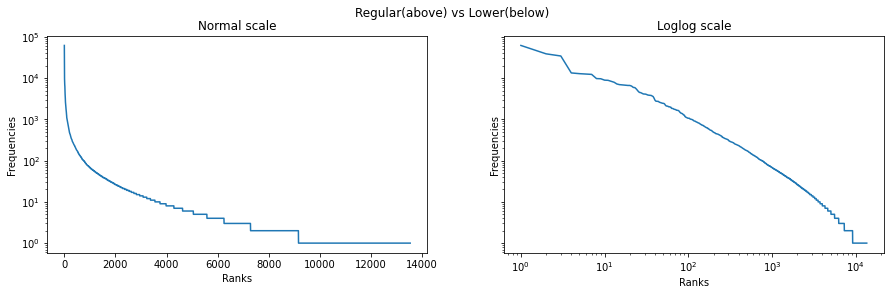

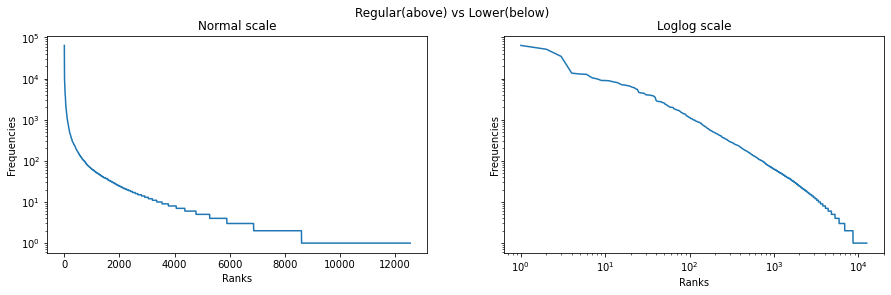

In [73]:
plotting(bible_tokens_dist)
plotting(bible_tokens_lower_dist)

In [62]:
print_table(bible_tokens_dist)

Rank      Token   Freq  Zipf's  Diff
   1        the  62064  62064      0
   2        and  38846  31032   7814
   3         of  34427  20688  13739
   4         to  13378  15516   2138
   5        And  12847  12412    435
   6       that  12576  10344   2232
   7         in  12331   8866   3465
   8      shall   9760   7758   2002
   9         he   9666   6896   2770
  10       unto   8940   6206   2734
  11          I   8854   5642   3212
  12        his   8385   5172   3213
  13          a   7943   4774   3169
  14        for   7228   4433   2795
  15       they   6970   4137   2833
  16         be   6877   3879   2998
  17         is   6832   3650   3182
  18        not   6737   3448   3289
  19       LORD   6651   3266   3385
  20        him   6649   3103   3546


In [63]:
print_table(bible_tokens_lower_dist)

Rank      Token   Freq  Zipf's  Diff
   1        the  63924  63924      0
   2        and  51696  31962  19734
   3         of  34617  21308  13309
   4         to  13562  15981   2419
   5       that  12912  12784    128
   6         in  12667  10654   2013
   7         he  10420   9132   1288
   8      shall   9838   7990   1848
   9       unto   8997   7102   1895
  10        for   8971   6392   2579
  11          i   8854   5811   3043
  12        his   8473   5327   3146
  13          a   8177   4917   3260
  14       lord   7964   4566   3398
  15       they   7376   4261   3115
  16         be   7013   3995   3018
  17         is   6989   3760   3229
  18        not   6780   3551   3229
  19        him   6659   3364   3295
  20       them   6430   3196   3234


## The jungle book analysis

In [11]:
jungle_tokens = load_corpus("junglebook.txt", to_lower=False)
jungle_tokens_lower = load_corpus("junglebook.txt", to_lower=True)

Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/junglebook.txt
Starting text preprocessing...
Text preprocessing is finished!
Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/junglebook.txt
Starting text preprocessing with lowering...
Text preprocessing is finished!


In [13]:
jungle_tokens_dist = do_count_and_sort(jungle_tokens)
jungle_tokens_lower_dist = do_count_and_sort(jungle_tokens_lower)

Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 54047
Number of unique tokens: 5644
Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 54047
Number of unique tokens: 4846


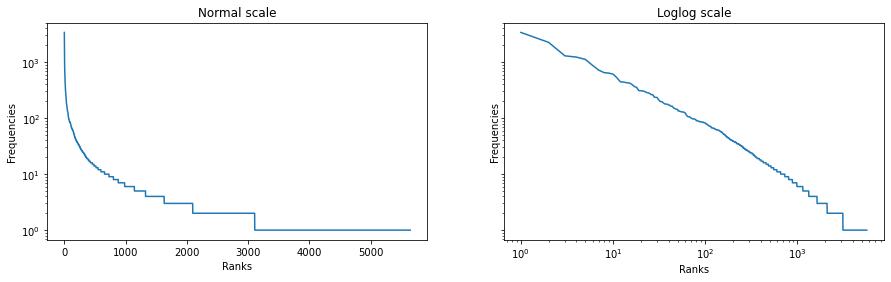

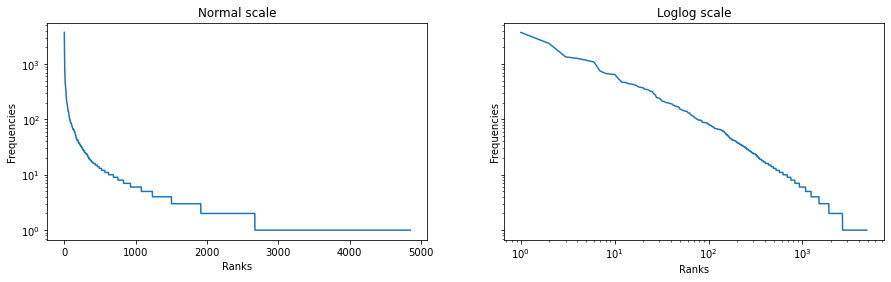

In [14]:
plotting(jungle_tokens_dist)
plotting(jungle_tokens_lower_dist)

In [64]:
print_table(jungle_tokens_dist)

Rank      Token   Freq  Zipf's  Diff
   1        the   3397   3397      0
   2        and   2259   1698    561
   3         of   1298   1132    166
   4         to   1232    849    383
   5          a   1122    679    443
   6         he    875    566    309
   7         in    720    485    235
   8          I    650    424    226
   9        his    638    377    261
  10       that    611    339    272
  11        was    528    308    220
  12         is    445    283    162
  13        for    441    261    180
  14       said    430    242    188
  15       with    424    226    198
  16         as    402    212    190
  17        him    367    199    168
  18         on    355    188    167
  19        not    311    178    133
  20         it    308    169    139


In [65]:
print_table(jungle_tokens_lower_dist)

Rank      Token   Freq  Zipf's  Diff
   1        the   3727   3727      0
   2        and   2353   1863    490
   3         of   1347   1242    105
   4         to   1266    931    335
   5          a   1170    745    425
   6         he   1090    621    469
   7         in    746    532    214
   8       that    677    465    212
   9        his    659    414    245
  10          i    650    372    278
  11        was    539    338    201
  12        for    467    310    157
  13         is    465    286    179
  14       said    442    266    176
  15       with    436    248    188
  16         as    424    232    192
  17         it    411    219    192
  18       they    385    207    178
  19         on    379    196    183
  20        him    373    186    187


## SETIMES Turkish newspaper text analysis

In [17]:
turkish_tokens = load_corpus("SETIMES.bg-tr.tr", to_lower=False)
turkish_tokens_lower = load_corpus("SETIMES.bg-tr.tr", to_lower=True)

Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/SETIMES.bg-tr.tr
Starting text preprocessing...
Text preprocessing is finished!
Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/SETIMES.bg-tr.tr
Starting text preprocessing with lowering...
Text preprocessing is finished!


In [18]:
turkish_tokens_dist = do_count_and_sort(turkish_tokens)
turkish_tokens_lower_dist = do_count_and_sort(turkish_tokens_lower)

Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 3481082
Number of unique tokens: 159881
Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 3481082
Number of unique tokens: 144104


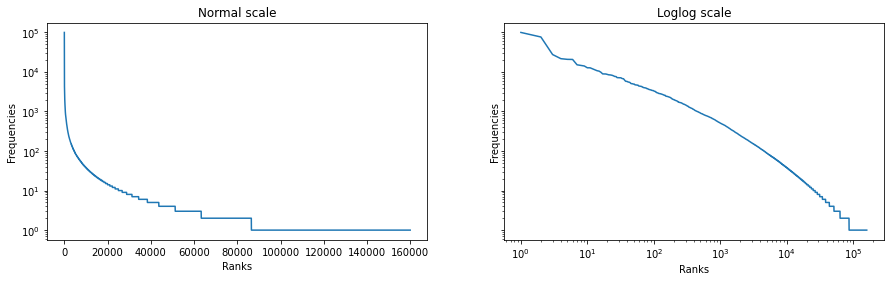

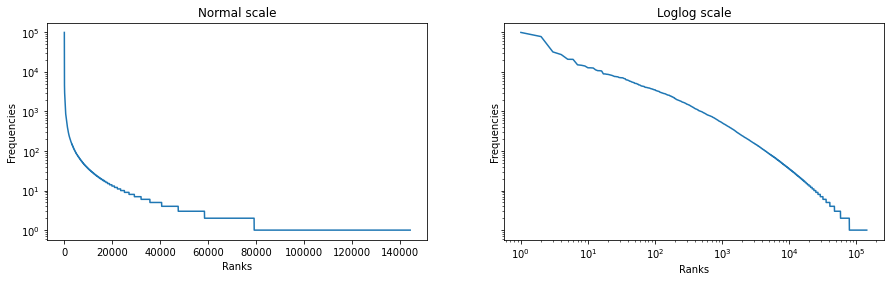

In [19]:
plotting(turkish_tokens_dist)
plotting(turkish_tokens_lower_dist)

In [66]:
print_table(turkish_tokens_dist)

Rank      Token   Freq  Zipf's  Diff
   1         ve  99241  99241      0
   2        bir  76150  49620  26530
   3       için  27414  33080   5666
   4         bu  21551  24810   3259
   5         da  20734  19848    886
   6         de  20608  16540   4068
   7        ile  15097  14177    920
   8       günü  14579  12405   2174
   9     olarak  14088  11026   3062
  10       olan  12688   9924   2764
  11         AB  12668   9021   3647
  12       daha  11939   8270   3669
  13       dedi  11279   7633   3646
  14    söyledi  10701   7088   3613
  15         Bu  10446   6616   3830
  16         en   9772   6202   3570
  17       yeni   8892   5837   3055
  18       göre   8879   5513   3366
  19          a   8840   5223   3617
  20   olduğunu   8638   4962   3676


In [67]:
print_table(turkish_tokens_lower_dist)

Rank      Token   Freq  Zipf's  Diff
   1         ve  99414  99414      0
   2        bir  78102  49707  28395
   3         bu  32001  33138   1137
   4       için  27414  24853   2561
   5         de  20840  19882    958
   6         da  20755  16569   4186
   7        ile  15097  14202    895
   8       günü  14701  12426   2275
   9     olarak  14108  11046   3062
  10       olan  12704   9941   2763
  11         ab  12671   9037   3634
  12       daha  12532   8284   4248
  13       dedi  11282   7647   3635
  14       yeni  10745   7101   3644
  15    söyledi  10715   6627   4088
  16         en  10557   6213   4344
  17          a   8894   5847   3047
  18       göre   8885   5523   3362
  19        çok   8719   5232   3487
  20   olduğunu   8647   4970   3677


## SETIMES Bulgarian newspaper text analysis

In [20]:
bulgarian_tokens = load_corpus("SETIMES.bg-tr.bg", to_lower=False)
bulgarian_tokens_lower = load_corpus("SETIMES.bg-tr.bg", to_lower=True)

Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/SETIMES.bg-tr.bg
Starting text preprocessing...
Text preprocessing is finished!
Corpus path: /home/pavle/codebase/jupyter_notebooks/comp_ling/corpora/SETIMES.bg-tr.bg
Starting text preprocessing with lowering...
Text preprocessing is finished!


In [21]:
bulgarian_tokens_dist = do_count_and_sort(bulgarian_tokens)
bulgarian_tokens_lower_dist = do_count_and_sort(bulgarian_tokens_lower)

Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 4219782
Number of unique tokens: 117190
Start counting...
Counting is finished!
Start sorting...
Sorting is finished!
Total number of tokens: 4219782
Number of unique tokens: 102788


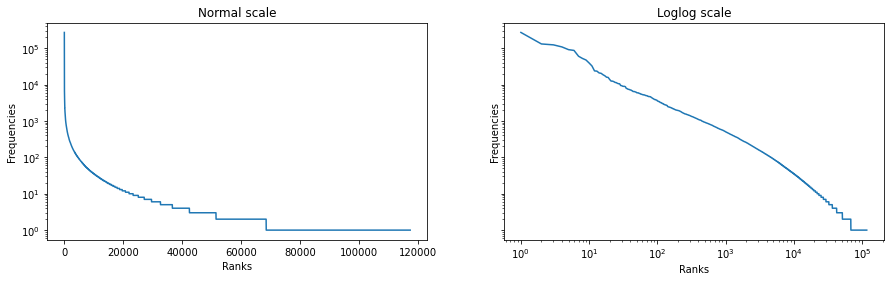

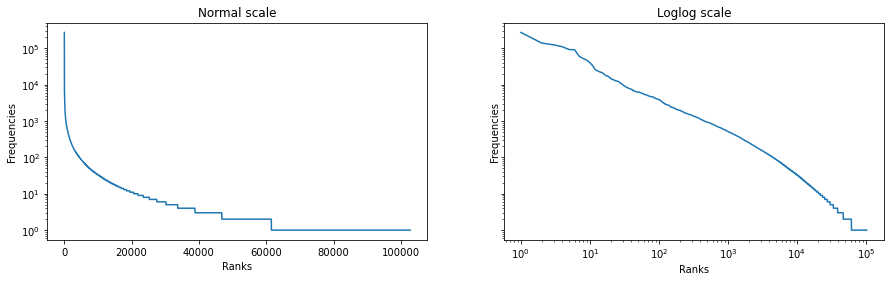

In [22]:
plotting(bulgarian_tokens_dist)
plotting(bulgarian_tokens_lower_dist)

In [68]:
print_table(bulgarian_tokens_dist)

Rank      Token   Freq  Zipf's  Diff
   1         на 271036 271036      0
   2          в 130836 135518   4682
   3          и 123542  90345  33197
   4         за 108292  67759  40533
   5         да  91152  54207  36945
   6         от  86946  45172  41774
   7         се  60106  38719  21387
   8          е  52206  33879  18327
   9         че  47397  30115  17282
  10          с  39189  27103  12086
  11         ще  32546  24639   7907
  12         са  23772  22586   1186
  13         по  23427  20848   2579
  14         не  20905  19359   1546
  15       като  20380  18069   2311
  16         си  18622  16939   1683
  17       каза  17456  15943   1513
  18         ЕС  15972  15057    915
  19       през  15733  14265   1468
  20      които  13814  13551    263


In [69]:
print_table(bulgarian_tokens_lower_dist)

Rank      Token   Freq  Zipf's  Diff
   1         на 273230 273230      0
   2          в 139857 136615   3242
   3          и 124364  91076  33288
   4         за 110192  68307  41885
   5         от  92593  54646  37947
   6         да  91354  45538  45816
   7         се  60222  39032  21190
   8          е  52226  34153  18073
   9         че  47399  30358  17041
  10          с  40259  27323  12936
  11         ще  33253  24839   8414
  12         по  25631  22769   2862
  13         са  23784  21017   2767
  14         не  22316  19516   2800
  15       като  21454  18215   3239
  16         си  19569  17076   2493
  17       през  17740  16072   1668
  18       каза  17460  15179   2281
  19         ес  16074  14380   1694
  20       това  14977  13661   1316


## Discussion
